# Data Visualization

## Pre-requisite

Make sure you already have the following dataset inside of your path:
- 'data/laei_2016_lts_rd_gla.csv'
- 'data/gla_tree_map_2018.csv'
- 'data/diseases.csv'
- 'data/geo-data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'

In [1]:
pip install pandas

You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyxlsb

You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [291]:
pip install numpy

You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install matplotlib

     |████████████████████████████████| 11.3 MB 3.7 MB/s            
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 895 kB 23.4 MB/s            
     |████████████████████████████████| 4.3 MB 17.8 MB/s            
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 2.6 MB/s            
     |████████████████████████████████| 5.8 MB 34.7 MB/s            
     |████████████████████████████████| 1.1 MB 19.0 MB/s            
     |████████████████████████████████| 16.6 MB 39.4 MB/s            
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
You should consider upgrading via the '/mnt/c/Users/irvif/dev/data-visualization/.env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

## Getting GIS for Greater London Area(GLA)

We're using GIS provided inside of this [website](https://data.london.gov.uk/dataset/long-term-health-impacts-of-air-pollution)

In [292]:
# Set the filepath and load in a shapefile
map_file_path = "data/geo-data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
map_df = gpd.read_file(map_file_path)
map_df

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18..."
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19..."
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19..."
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18..."
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19..."


<AxesSubplot:>

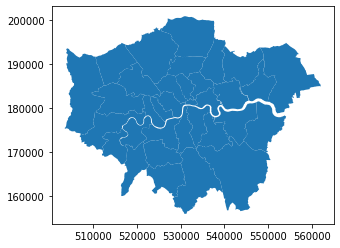

In [293]:
map_df.plot()

In [306]:
def generate_heat_map(df, variable):
    # set the range for the choropleth
    vmin, vmax = 120, 220
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 6))
    df.plot(column=variable, cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8")

In [314]:
def merge_df_with_gis_data(map_df, df, join_column):
    merged = map_df.copy().set_index("NAME").join(df.copy().set_index(join_column))
    # There will be NAN value for missing dada.
    merged = merged.fillna(0)
    return merged

## Creating Data Visualization

In [301]:
df_sheet_laei_2016_lts_rd_gla_copy = pd.read_csv("data/laei_2016_lts_rd_gla.csv")

### Getting Information Regarding Air Pollution in GLA


In [37]:
df_sheet_laei_2016_lts_rd_gla_copy.head()

,borough,length,emission,year,pollutant,motorcycle,taxi,petrol_car,diesel_car,electric_car,petrol_lgv,diesel_lgv,electric_lgv,tfl_bus,coach,rigid_hgv,artic_hgv,total
343477,Barking and Dagenham,10.563642,COPERT,2016,PM25_Brake,0.000012,1.646184e-05,0.000847,0.000578,2.394834e-06,2.271715e-06,1.770658e-04,2.962596e-07,0.000265,0.000000,0.000166,0.000014,0.002081
456536,Barking and Dagenham,0.000000,COPERT,2016,PM25_Resusp,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
456537,Barking and Dagenham,14.113797,COPERT,2016,PM25_Resusp,0.000000,2.280227e-07,0.000011,0.000008,3.164465e-08,2.917270e-08,2.273827e-06,3.804479e-09,0.000052,0.000016,0.000033,0.000005,0.000128
456538,Barking and Dagenham,14.355092,COPERT,2016,PM25_Resusp,0.000000,2.319211e-07,0.000011,0.000008,3.218566e-08,2.967145e-08,2.312701e-06,3.869522e-09,0.000052,0.000017,0.000034,0.000005,0.000130
456539,Barking and Dagenham,5.825940,COPERT,2016,PM25_Resusp,0.000000,9.412398e-08,0.000005,0.000003,1.306238e-08,1.204201e-08,9.385979e-07,1.570425e-09,0.000021,0.000007,0.000014,0.000002,0.000053


In [38]:
df_sheet_laei_2016_lts_rd_gla_copy["pollutant"].unique()

array(['PM25_Brake', 'PM25_Resusp', 'NOx', 'PM10_Exhaust', 'PM25_Tyre',
       'PM25_Exhaust', 'PM10_Tyre', 'PM10_Brake', 'PM10_Resusp', 'CO2'],
      dtype=object)

In [62]:
df_sheet_laei_2016_lts_rd_gla_copy["toid"].unique()

array([4000000030430915, 4000000031048640, 4000000031048641, ...,
       4000000030321737, 4000000030321969, 4000000030321735])

In [69]:
# High pollutant in each of borough based on available street information
summarized_parameters = [
    "length",
    "motorcycle",
    "taxi",
    "petrol_car",
    "diesel_car",
    "electric_car",
    "petrol_lgv",
    "diesel_lgv",
    "electric_lgv",
    "total",
]
summary_of_pollutant_per_borough = df_sheet_laei_2016_lts_rd_gla_copy.groupby(
    by=["borough", "pollutant", "year", "toid"], as_index=False
)[summarized_parameters].sum()

In [302]:
summary_of_pollutant_per_borough.head()

,borough,pollutant,year,toid,length,motorcycle,taxi,petrol_car,diesel_car,electric_car,petrol_lgv,diesel_lgv,electric_lgv,total
0,Barking and Dagenham,CO2,2016,4000000030076500,220.100486,7.592021,9.196101,324.907785,194.539275,0.0,1.492897,116.549879,0.0,726.789077
1,Barking and Dagenham,CO2,2016,4000000030082641,362.578730,20.316954,21.413225,662.046438,389.509927,0.0,3.562255,309.867444,0.0,2394.928459
2,Barking and Dagenham,CO2,2016,4000000030082642,362.646021,20.971796,21.698211,690.146189,413.535733,0.0,3.753825,313.599333,0.0,2520.273193
3,Barking and Dagenham,CO2,2016,4000000030082838,112.860042,3.273125,6.275125,223.007497,134.146868,0.0,1.473551,113.660418,0.0,785.229639
4,Barking and Dagenham,CO2,2016,4000000030082839,112.152520,3.358130,6.219181,231.785896,142.037577,0.0,1.550103,115.815228,0.0,817.444758


In [451]:
unique_borough = summary_of_pollutant_per_borough["borough"].unique()
unique_borough

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City', 'City of Westminster', 'Croydon', 'Ealing',
       'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham',
       'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow',
       'Islington', 'Kensington and Chelsea', 'Kingston', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond',
       'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest',
       'Wandsworth'], dtype=object)

In [452]:
summary_of_pollutant_per_borough = summary_of_pollutant_per_borough.replace(
    {"borough": {"City": "City of London"}}
)

In [453]:
def generate_plot_based_on_pollutant(ax, summary_of_pollutant_per_borough, pollutant):
    df = (
        summary_of_pollutant_per_borough[
            summary_of_pollutant_per_borough["pollutant"] == pollutant
        ]
        .groupby(["borough"], as_index=False)
        .sum()
    )
    x, y = df[["borough"]], df[["total"]]
    return x, y

<Figure size 432x288 with 0 Axes>

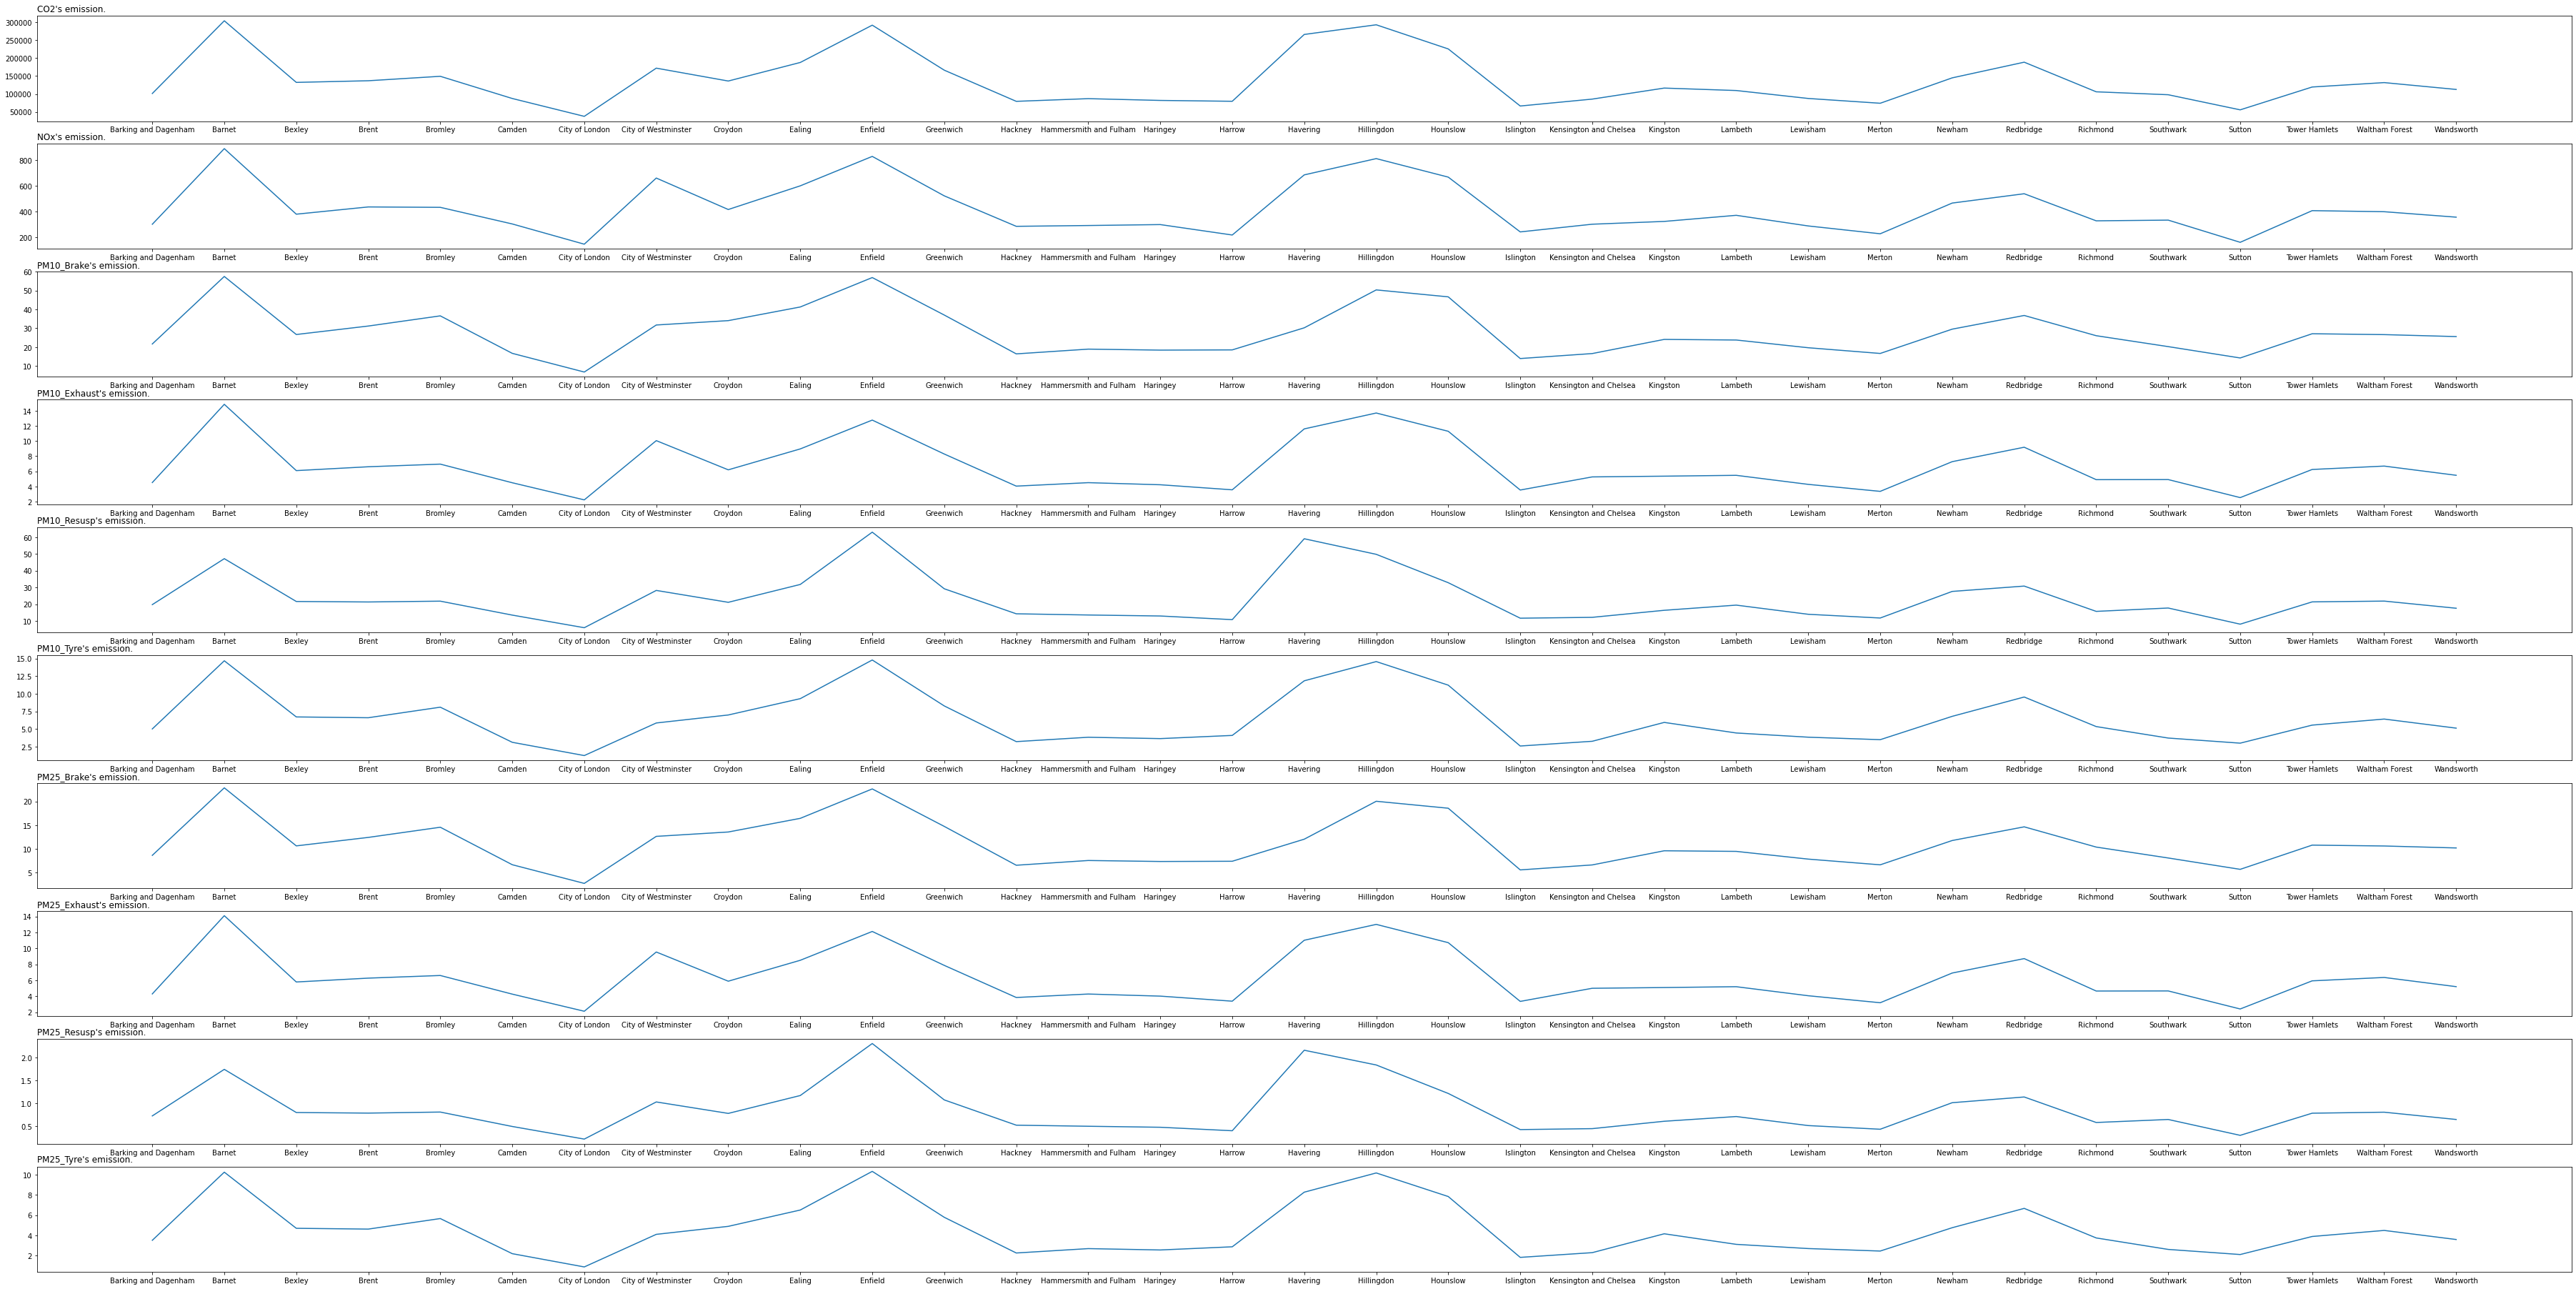

In [462]:
from pylab import *
import numpy as np

pollutants = list(summary_of_pollutant_per_borough["pollutant"].unique())
subplots_adjust(hspace=0.000)
number_of_subplots = len(pollutants)
fig, ax = plt.subplots(number_of_subplots, 1, figsize=(50, 25))
fig.tight_layout()
for i in range(number_of_subplots):
    x, y = generate_plot_based_on_pollutant(
        ax1, summary_of_pollutant_per_borough, pollutants[i]
    )
    ax[i].set_title(
        "{pollutant}'s emission.".format(pollutant=pollutants[i]), loc="left"
    )
    ax[i].plot(x.borough, y.total)

In [463]:
def get_summary_based_on_pollutant(summary_of_pollutant_per_borough, pollutant):
    sm = (
        summary_of_pollutant_per_borough[
            summary_of_pollutant_per_borough["pollutant"] == pollutant
        ]
        .groupby(["borough", "year"], as_index=False)
        .sum()
    )
    return sm

In [464]:
pollutant = "NOx"
sm_nox = get_summary_based_on_pollutant(summary_of_pollutant_per_borough, pollutant)
sm_nox.head()

,borough,year,toid,length,motorcycle,taxi,petrol_car,diesel_car,electric_car,petrol_lgv,diesel_lgv,electric_lgv,total
0,Barking and Dagenham,2016,3512000026817707008,41435.420260,0.873769,4.259715,27.167381,86.243957,0.0,0.391133,54.528524,0.0,301.074770
1,Barnet,2016,9132000069588072448,116482.862503,3.946050,37.821658,91.291155,288.897599,0.0,1.202326,171.964151,0.0,890.192014
2,Bexley,2016,5524000042149153792,76716.551923,1.758533,5.609361,40.196030,123.183979,0.0,0.592231,78.495318,0.0,379.598802
3,Brent,2016,5000000038069010432,58629.050435,1.406323,28.095114,35.928812,119.096725,0.0,0.456742,69.435251,0.0,436.052968
4,Bromley,2016,6124000046570431488,113851.162321,1.668926,6.647256,47.620574,152.374263,0.0,0.611455,88.518562,0.0,432.858677


In [465]:
join_column = "borough"
merged = merge_df_with_gis_data(map_df, sm_nox, join_column)
merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,year,toid,length,motorcycle,taxi,petrol_car,diesel_car,electric_car,petrol_lgv,diesel_lgv,electric_lgv,total
NAME,,,,,,,,,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,0,0,"POLYGON ((516401.600 160201.800, 516407.300 16...",0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
Croydon,E09000008,8649.441,0.000,F,0,0,"POLYGON ((535009.200 159504.700, 535005.500 15...",2016.0,6.324000e+18,92465.976572,1.293224,5.904002,39.547516,131.652174,0.0,0.472085,73.102951,0.0,415.965719
Bromley,E09000006,15013.487,0.000,F,0,0,"POLYGON ((540373.600 157530.400, 540361.200 15...",2016.0,6.124000e+18,113851.162321,1.668926,6.647256,47.620574,152.374263,0.0,0.611455,88.518562,0.0,432.858677
Hounslow,E09000018,5658.541,60.755,F,0,0,"POLYGON ((521975.800 178100.000, 521967.700 17...",2016.0,6.920000e+18,89405.054654,3.523178,41.055891,68.857556,218.697486,0.0,0.840923,120.194691,0.0,668.346725
Ealing,E09000009,5554.428,0.000,F,0,0,"POLYGON ((510253.500 182881.600, 510249.900 18...",2016.0,4.816000e+18,64873.372563,2.469186,21.932127,51.195221,163.735922,0.0,0.735636,104.560326,0.0,600.375867


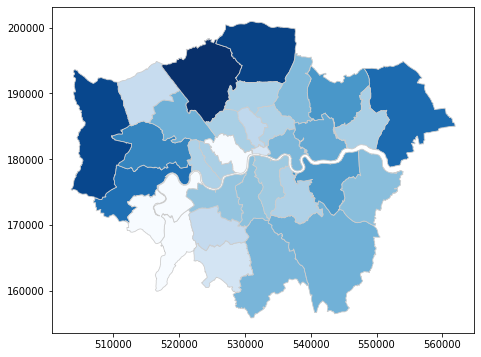

In [466]:
generate_heat_map(merged, "total")

## Visualizing the Impact of Air Pollution to Human's Health

We would like to see the relationship betwen air pollution and health in the Greater London Area (GLA) as it was mentioned inside of
this [report](https://www.london.gov.uk/what-we-do/environment/pollution-and-air-quality/health-and-exposure-pollution).

In general there are two pollutants of concern:
- Particulate Matter (PM 2.5)
- Nitrogen Dioxide (NO2)

IN the current implementation we only take a look into NOx (NO2).

In [167]:
def get_diseases_data_prediction(input_file_path):
    df_diseases_data_prediction = pd.read_csv(input_file_path)
    columns_mapping = {
        "Year": "year",
        "Disease": "disease",
        "AgeGroup": "age_group",
        "Incidence": "incidence",
        "95% CL": "above_threshold",
        "Borough": "borough",
    }
    df_diseases_data_prediction = df_diseases_data_prediction.rename(
        columns=columns_mapping
    )
    return df_diseases_data_prediction

In [186]:
diseases_data_prediction_input_file_path = "data/diseases.csv"
diseases_data_prediction = get_diseases_data_prediction(
    diseases_data_prediction_input_file_path
)
diseases_data_prediction.head()

,year,disease,age_group,incidence,above_threshold,borough
0,2016,childhood asthma,0-5,122,1,Barking
1,2016,childhood asthma,06-17,98,1,Barking
2,2016,childhood asthma,18-64,0,0,Barking
3,2016,childhood asthma,65+,0,0,Barking
4,2016,adult asthma,0-5,0,0,Barking


In [187]:
def get_diseases_insight_based_on_filter(diseases_data_prediction, filters):
    sm = diseases_data_prediction.groupby(filters, as_index=False).sum()
    return sm

In [188]:
diseases_summary = get_diseases_insight_based_on_filter(
    diseases_data_prediction, ["borough", "disease", "year", "above_threshold"]
)
diseases_summary.head()

,borough,disease,year,above_threshold,incidence
0,Barking,adult asthma,2016,0,17
1,Barking,adult asthma,2016,1,114
2,Barking,adult asthma,2017,0,16
3,Barking,adult asthma,2017,1,114
4,Barking,adult asthma,2018,0,16


In [303]:
diseases_summary_with_low_pollutant = diseases_summary[
    diseases_summary["above_threshold"] == 0
]
diseases_summary_with_low_pollutant = diseases_summary_with_low_pollutant.drop(
    ["above_threshold"], axis=1
)
diseases_summary_with_low_pollutant.head()

,borough,disease,year,incidence
0,Barking,adult asthma,2016,17
2,Barking,adult asthma,2017,16
4,Barking,adult asthma,2018,16
6,Barking,childhood asthma,2016,0
8,Barking,childhood asthma,2017,0


In [190]:
diseases_summary_with_high_pollutant = diseases_summary[
    diseases_summary["above_threshold"] == 1
]
diseases_summary_with_high_pollutant = diseases_summary_with_high_pollutant.drop(
    ["above_threshold"], axis=1
)
diseases_summary_with_high_pollutant.head()

,borough,disease,year,incidence
1,Barking,adult asthma,2016,114
3,Barking,adult asthma,2017,114
5,Barking,adult asthma,2018,113
7,Barking,childhood asthma,2016,220
9,Barking,childhood asthma,2017,219


In [475]:
def create_plot_on_year(
    diseases_summary_with_high_pollutant, diseases_summary_with_low_pollutant, year
):
    plt.figure(figsize=(25, 10))
    diseases_summary_with_high_pollutant_year = (
        diseases_summary_with_high_pollutant[
            diseases_summary_with_high_pollutant["year"] == year
        ]
        .groupby(["borough"], as_index=False)
        .sum()
    )
    diseases_summary_with_low_pollutant_year = (
        diseases_summary_with_low_pollutant[
            diseases_summary_with_low_pollutant["year"] == year
        ]
        .groupby(["borough"], as_index=False)
        .sum()
    )
    fig, ax = plt.subplots(1, figsize=(20, 6))
    ax = diseases_summary_with_high_pollutant_year.set_index("borough").plot(
        kind="bar", ax=ax, y="incidence", color="C2"
    )
    diseases_summary_with_low_pollutant_year.set_index("borough").plot(
        kind="bar", ax=ax, y="incidence", color="C1"
    )
    ax.legend(labels=["Incidence in High Pollution", "Incidence in Low Pollution"])

<Figure size 1800x720 with 0 Axes>

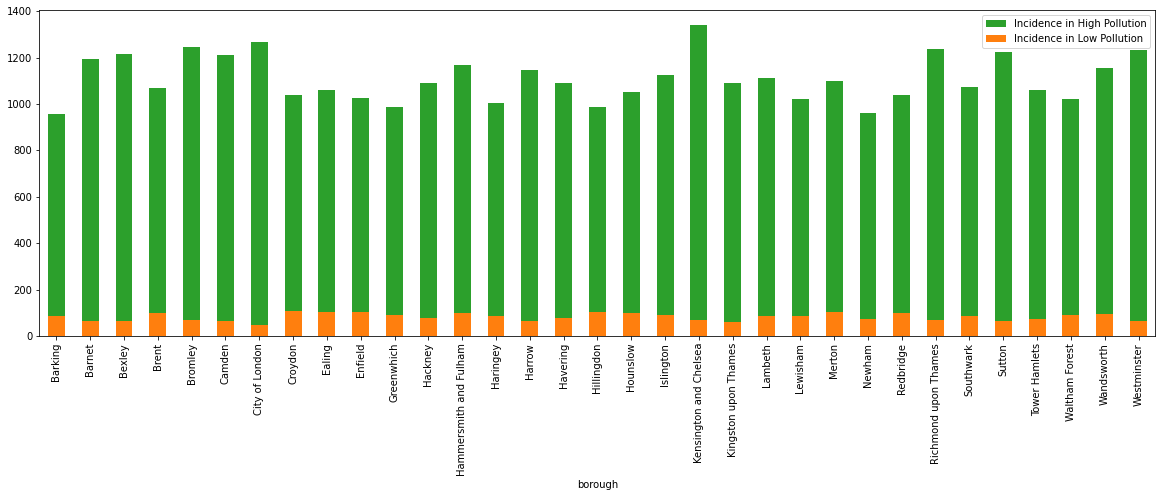

In [476]:
# Those with higher exposure will have larger incidence
create_plot_on_year(
    diseases_summary_with_high_pollutant, diseases_summary_with_low_pollutant, 2016
)

<Figure size 1800x720 with 0 Axes>

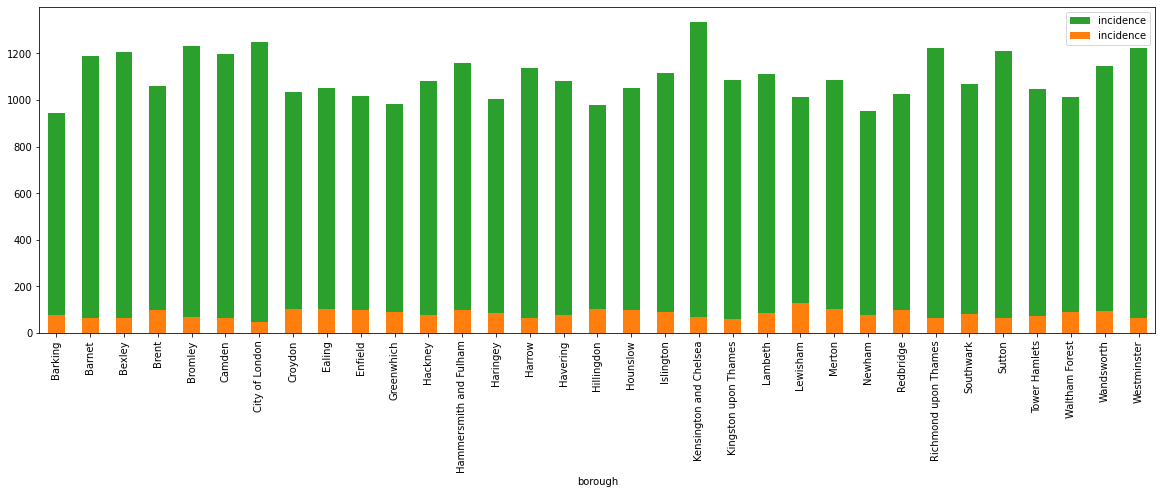

In [311]:
create_plot_on_year(
    diseases_summary_with_high_pollutant, diseases_summary_with_low_pollutant, 2017
)

<Figure size 1800x720 with 0 Axes>

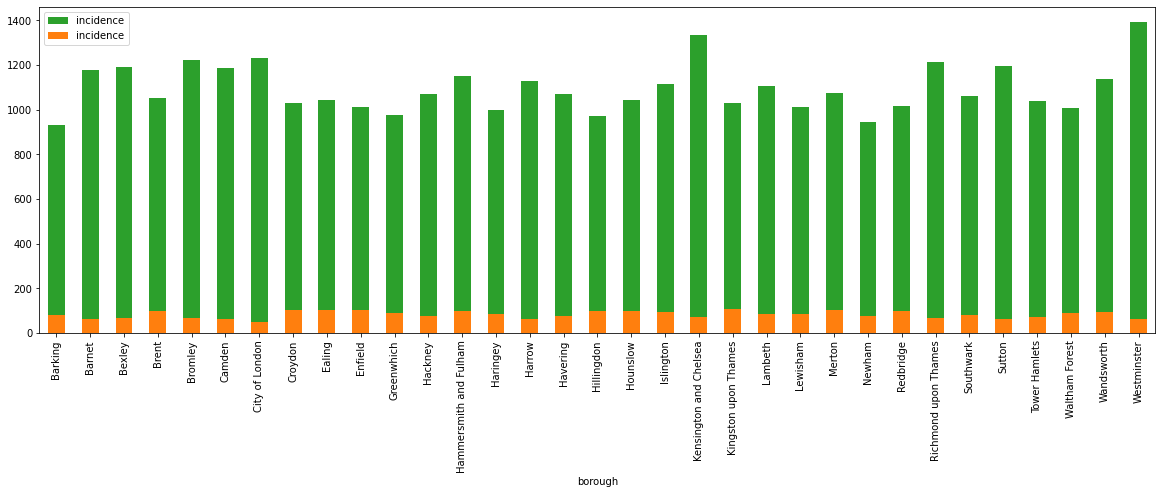

In [312]:
create_plot_on_year(
    diseases_summary_with_high_pollutant, diseases_summary_with_low_pollutant, 2018
)

## Visualizing Heatmap of Green Spaces in GLA

In [313]:
df_sheet_gla_tree_map_2018 = pd.read_csv("data/gla_tree_map_2018.csv")
df_sheet_gla_tree_map_2018.head()

,borough,load_date,longitude,latitude
0,Barking,20180214,0.139454,51.585695
1,Barking,20180214,0.139123,51.585670
2,Barking,20180214,0.139004,51.585689
3,Barking,20180214,0.139134,51.585732
4,Barking,20180214,0.139288,51.585819


In [319]:
def count_trees_for_each_borough(df):
    trees_count = df.groupby(["borough", "load_date"], as_index=False).value_counts()
    trees_count = trees_count[["borough", "count"]]
    trees_count = trees_count.groupby(["borough"], as_index=False).count()
    trees_count.head()
    return trees_count

In [320]:
tree_count = count_trees_for_each_borough(df_sheet_gla_tree_map_2018)
tree_count.head()

,borough,count
0,Barking,16328
1,Barnet,39377
2,Bexley,11237
3,Bromley,68063
4,Camden,21592


In [321]:
join_column = "borough"
tree_map = merge_df_with_gis_data(map_df, tree_count, join_column)
tree_map.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,count
NAME,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,0,0,"POLYGON ((516401.600 160201.800, 516407.300 16...",0.0
Croydon,E09000008,8649.441,0.000,F,0,0,"POLYGON ((535009.200 159504.700, 535005.500 15...",0.0
Bromley,E09000006,15013.487,0.000,F,0,0,"POLYGON ((540373.600 157530.400, 540361.200 15...",68063.0
Hounslow,E09000018,5658.541,60.755,F,0,0,"POLYGON ((521975.800 178100.000, 521967.700 17...",32469.0
Ealing,E09000009,5554.428,0.000,F,0,0,"POLYGON ((510253.500 182881.600, 510249.900 18...",40753.0


In [322]:
tree_map = tree_map.fillna(0)
tree_map.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,count
NAME,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,0,0,"POLYGON ((516401.600 160201.800, 516407.300 16...",0.0
Croydon,E09000008,8649.441,0.000,F,0,0,"POLYGON ((535009.200 159504.700, 535005.500 15...",0.0
Bromley,E09000006,15013.487,0.000,F,0,0,"POLYGON ((540373.600 157530.400, 540361.200 15...",68063.0
Hounslow,E09000018,5658.541,60.755,F,0,0,"POLYGON ((521975.800 178100.000, 521967.700 17...",32469.0
Ealing,E09000009,5554.428,0.000,F,0,0,"POLYGON ((510253.500 182881.600, 510249.900 18...",40753.0


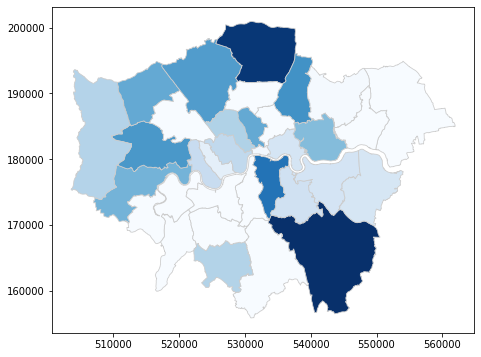

In [296]:
generate_heat_map(tree_map, "count")